In [2]:
import pandas as pd
import numpy as np

In [5]:
#np.nan will craete a empty value as NaN

In [42]:
dict1={'Names':['Aravind','Samar',np.nan,'Sirir'],
        'Age':[np.nan,21,32,43],
        'city':['Hyd','Blr','Chennai',np.nan]}
dict1

{'Names': ['Aravind', 'Samar', nan, 'Sirir'],
 'Age': [nan, 21, 32, 43],
 'city': ['Hyd', 'Blr', 'Chennai', nan]}

In [45]:
d1=pd.DataFrame(dict1)

In [7]:
d1.dtypes

Names     object
Age      float64
city      object
dtype: object

In [19]:
dict2={'Names':['Aravind','Samar',None,'Sirir'],
        'Age':[np.nan,21,32,43],
        'city':['Hyd','Blr','Chennai',None]}
pd.DataFrame(dict2)

,Names,Age,city
0,Aravind,NaN,Hyd
1,Samar,21.0,Blr
2,None,32.0,Chennai
3,Sirir,43.0,None


In [12]:
d1.isnull()

,Names,Age,city
0,False,True,False
1,False,False,False
2,True,False,False
3,False,False,True


In [13]:
d1.isnull().sum()

Names    1
Age      1
city     1
dtype: int64

In [15]:
d1.isnull().sum()*100/len(d1)

Names    25.0
Age      25.0
city     25.0
dtype: float64

- np.nan: not a number this applicable for only numerical columns only

- generally data has some empty rows

- It is a data problem

- If you read that kind of data you will se Null

- You need to understand it is a data corrupted or really a Null values are there

**method-1**

**Fill with some random value**

**method name:** Fill na

In [20]:
d1.fillna(40)

,Names,Age,city
0,Aravind,40.0,Hyd
1,Samar,21.0,Blr
2,40,32.0,Chennai
3,Sirir,43.0,40


**Method-2**

- We can fill the values w.r.t columns also


In [32]:
d1['Age'].fillna(40)

#it will not updated
#inplace=False

0    40.0
1    21.0
2    32.0
3    43.0
Name: Age, dtype: float64

In [33]:
d1

,Names,Age,city
0,Aravind,NaN,Hyd
1,Samar,21.0,Blr
2,NaN,32.0,Chennai
3,Sirir,43.0,NaN


In [35]:
d1['Age'].fillna(40,inplace=True)
d1

,Names,Age,city
0,Aravind,40.0,Hyd
1,Samar,21.0,Blr
2,NaN,32.0,Chennai
3,Sirir,43.0,NaN


In [38]:
d1['Names'].fillna('Kolli',inplace=True)
d1

,Names,Age,city
0,Aravind,40.0,Hyd
1,Samar,21.0,Blr
2,Kolli,32.0,Chennai
3,Sirir,43.0,NaN


**Method-3**

- bfill

- ffill

- pad

- backfill

In [46]:
d1.fillna(method='bfill')

#column1: Names index 4 is missing values it is filled with index 3 value
#column2: Age index 1 is missing values it is filled with index 2 value
#column3: city index 4 is missing values it should be fill with next value but we don't have next value

C:\Users\kolli\AppData\Local\Temp\ipykernel_4276\2599890299.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d1.fillna(method='bfill')


,Names,Age,city
0,Aravind,21.0,Hyd
1,Samar,21.0,Blr
2,Sirir,32.0,Chennai
3,Sirir,43.0,NaN


In [48]:
d1.fillna(method='ffill')

C:\Users\kolli\AppData\Local\Temp\ipykernel_4276\4088926743.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d1.fillna(method='ffill')


,Names,Age,city
0,Aravind,NaN,Hyd
1,Samar,21.0,Blr
2,Samar,32.0,Chennai
3,Sirir,43.0,Chennai


In [50]:
d1.fillna(method='bfill',axis=1)
#axis=1 means columns
#so next column value is filling

C:\Users\kolli\AppData\Local\Temp\ipykernel_4276\3734778763.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d1.fillna(method='bfill',axis=1)


,Names,Age,city
0,Aravind,Hyd,Hyd
1,Samar,21.0,Blr
2,32.0,32.0,Chennai
3,Sirir,43.0,NaN


- backfill and bill fill with next value

- Pad and ffill with previous value

- but it will chnage based on axis

In [51]:
d1.fillna(method='pad')

C:\Users\kolli\AppData\Local\Temp\ipykernel_4276\3282249208.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d1.fillna(method='pad')


,Names,Age,city
0,Aravind,NaN,Hyd
1,Samar,21.0,Blr
2,Samar,32.0,Chennai
3,Sirir,43.0,Chennai


**method-4**

- mean

    - Numerical value can fill with mean value

    - but mean affect by outliers

    - if we don't have outliers it is best one

- median

    - Numerical values can fill with median value

    - We know that median value doesn't affect with outliers

    - so it outliers are there we can go with median

- mode

    - Mode is useful for categorical data

In [53]:
dict1={'Names':['Aravind','Samar',np.nan,'Sirir'],
        'Age':[np.nan,21,32,43],
        'city':['Hyd','Blr','Chennai',np.nan]}
d1=pd.DataFrame(dict1)

In [54]:
#we already know we can fill with some values based on specific column using first 
#d1.fillna(<random_number>)
#d1 represents all the columns
age_mean=d1['Age'].mean()
d1['Age'].fillna(age_mean)

0    32.0
1    21.0
2    32.0
3    43.0
Name: Age, dtype: float64

In [55]:
#with median
age_median=d1['Age'].median()
d1['Age'].fillna(age_median)

0    32.0
1    21.0
2    32.0
3    43.0
Name: Age, dtype: float64

In [56]:
#with mode
age_mode=d1['Age'].mode()
d1['Age'].fillna(age_mode)

0    21.0
1    21.0
2    32.0
3    43.0
Name: Age, dtype: float64

In [58]:
d1['city'].mode()
#in this case we are getting mode equal
#but in real time we will get clear mode value

0        Blr
1    Chennai
2        Hyd
Name: city, dtype: object

**method-5**

**KNN imputer**

- KNN: K neartest Neighbours

- K is a hyper parameter means user can choose

- It is distance metric:**Euclidian distance**

- KNN imputer will take the mean of the neighbours value

- The neighbours value can provided by using =k

- it is under sklearn package

- under sklearn we have impute method

- under imputer method we have KnnImputer

- Applicable only for numerical data

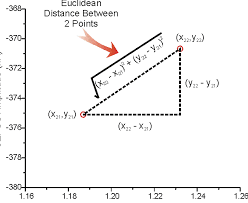

In [59]:
from sklearn.impute import KNNImputer
KI=KNNImputer()
KI.fit_transform(d1[['Age']])

array([[32.],
       [21.],
       [32.],
       [43.]])